<a href="https://colab.research.google.com/github/nehana4sph/TCS-iON_RIO-125-Forecasting-System/blob/main/New_Sales_Forecasting_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas==1.2.0
!pip install xlrd==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 4.6 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.9 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [4]:
#Importing required libraries
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import xlrd

Mounted at /content/gdrive


In [5]:
df = pd.read_excel('/content/gdrive/MyDrive/Internship/Superstore.xls')
print(df.head())
print(df.tail())

   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10

Order Date
2017-01-01     967.013136
2017-02-01     389.882737
2017-03-01     538.899481
2017-04-01     558.229296
2017-05-01     508.776444
2017-06-01     650.463038
2017-07-01     393.902615
2017-08-01    1156.148154
2017-09-01    1139.137250
2017-10-01     886.045846
2017-11-01    1124.012036
2017-12-01    1049.549724
Freq: MS, Name: Sales, dtype: float64


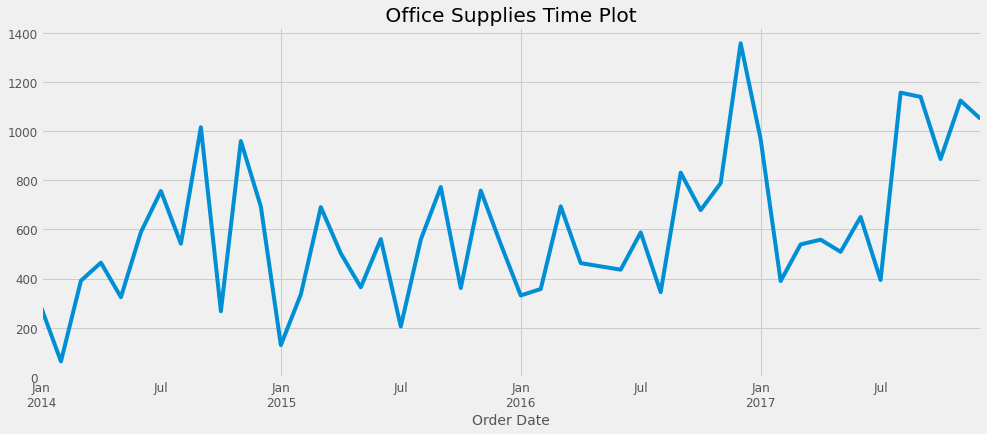

In [6]:
#data preprocessing for category office supplies
office = df.loc[df['Category'] == 'Office Supplies']
office['Order Date'].min(), office['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
office.drop(cols, axis=1, inplace = True)
office = office.sort_values('Order Date')
office.isnull().sum()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
office.index
y = office['Sales'].resample('MS').mean()
print(y['2017':])
y.plot(figsize=(15,6))
plt.title(' Office Supplies Time Plot ')
plt.show()


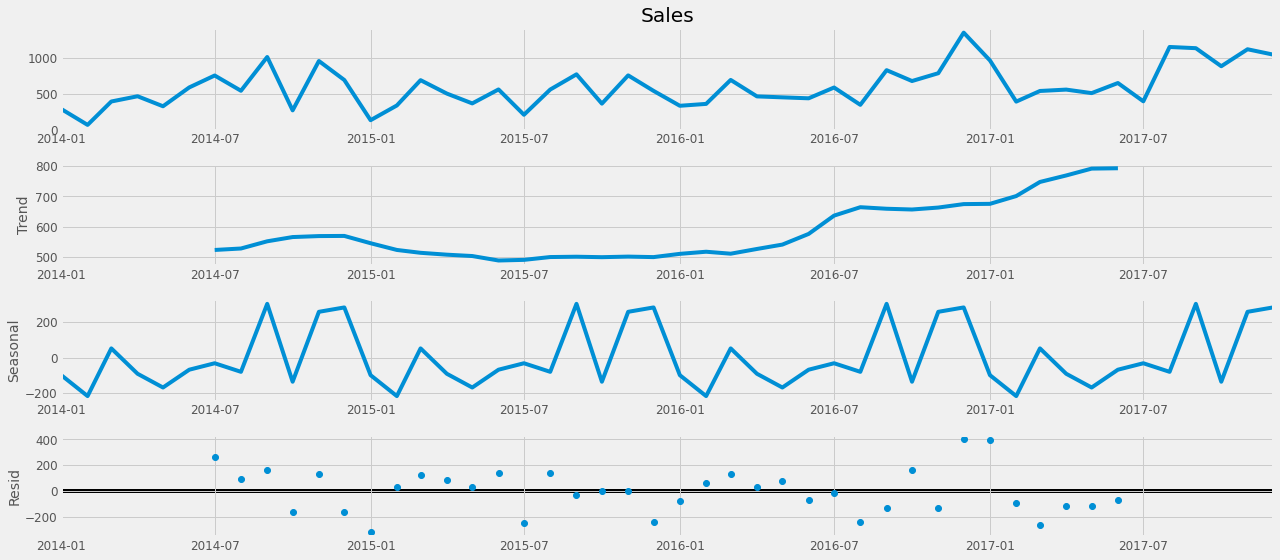

In [7]:
#Time Series Decomposition
from pylab import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [8]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA......')
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1],seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2],seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA......
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
          continue
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:747.1990404227043


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1520.8837323204987
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:500.7335398780616
ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:333.7101496510632
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:516.0876543936834


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:968.3650607406034
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:347.44488563489716
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:335.9078573355683
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:702.6891395292469
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:2705.9620631199587


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:487.7601415814768
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:319.8625957279279
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:517.4952646587349


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:2605.3454208339926
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:345.69220944601244
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:320.8450775284917
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:666.4572045007284
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1558.271660728152


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:503.0840747554472
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:323.4201040094139
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:500.0109385290892


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1355.442546482497
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:335.7148959418817
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:322.9595403092605
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:637.353000882819


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:2487.8108022983406
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:473.7153967455396
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:302.480882410626
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:489.94199700276897


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:2562.342086523372
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:330.7061513093211
ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:303.7694358428228
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:680.4032716562347


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:1472.8370543493152
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:501.7031226672368
ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:331.4711118151583
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:500.2190534421444


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:nan
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:331.0719973255116
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:332.93748843851563
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:651.17682643085


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:2575.987136447064
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:488.43141961328286
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:317.77404794100727
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:489.2546400441612


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:980.5114352531346
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:331.7136802273572
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:318.34189985310076
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:658.0713305703066
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1985.4437527390955
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:494.907679737394
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:321.1048910078484
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:482.80837530249573


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1400.7505576781077
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:321.2325469883935
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:321.39217693260554
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:638.7962401173762


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:387.5314347324713
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:475.7138851956534
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:304.2342988745871
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:478.69873017432536


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:707.5995774176216
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:318.2066479085234
ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:305.3485156762677
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8436      0.117     -7.239      0.000      -1.072      -0.615
ma.S.L12      -1.0001      0.201     -4.978      0.000      -1.394      -0.606
sigma2      4.502e+04   4.46e-06   1.01e+10      0.000     4.5e+04     4.5e+04


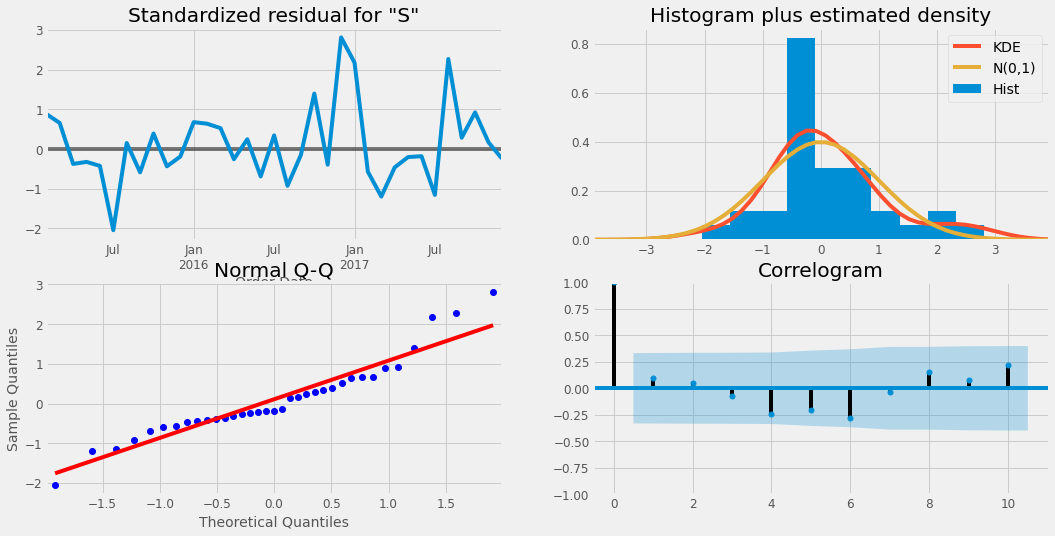

In [10]:
#Plotting Diagnostic Plots
results.plot_diagnostics(figsize=(16, 8))
plt.show()

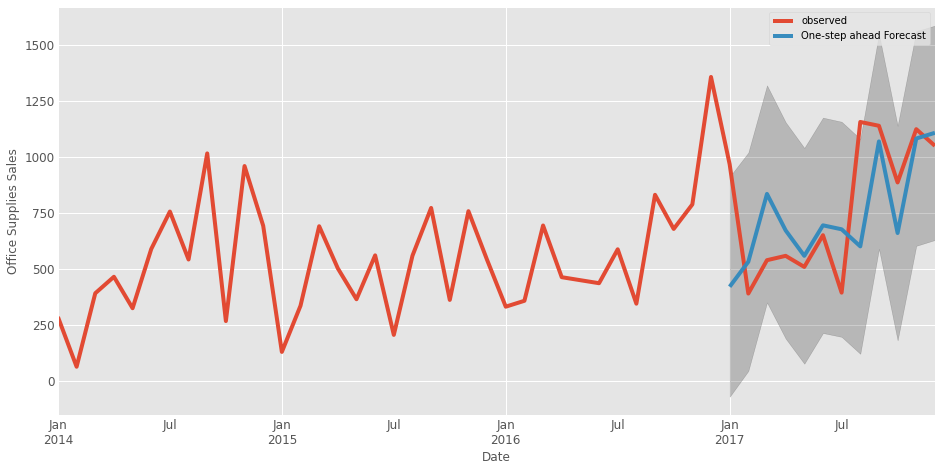

The Mean Squared Error of our forecasts is 72799.17
The Root Mean Squared Error of our forecasts is 269.81


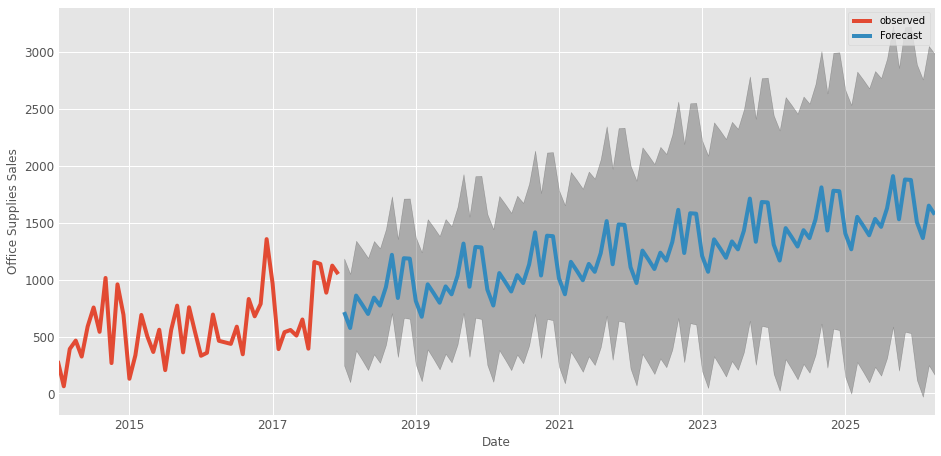

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast' , alpha = 7, figsize=(14,7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha= .2)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01' :]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

#####The Mean Squared Error of our forecasts is 67893.5#####
#####The Root Mean Squared Error of our forecasts is 260.56#####


##Comparing Categories

In [12]:
office = df.loc[df['Category'] == 'Office Supplies']
office['Order Date'].min(), office['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
office.drop(cols, axis=1, inplace = True)
office = office.sort_values('Order Date')
office.isnull().sum()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
office.index
office1 = office['2017':]


furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols, axis=1, inplace = True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture1 = furniture['2017':]

technology = df.loc[df['Category'] == 'Technology']
technology['Order Date'].min(), technology['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
technology.drop(cols, axis=1, inplace = True)
technology = technology.sort_values('Order Date')
technology.isnull().sum()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
technology1 = technology['2017':]



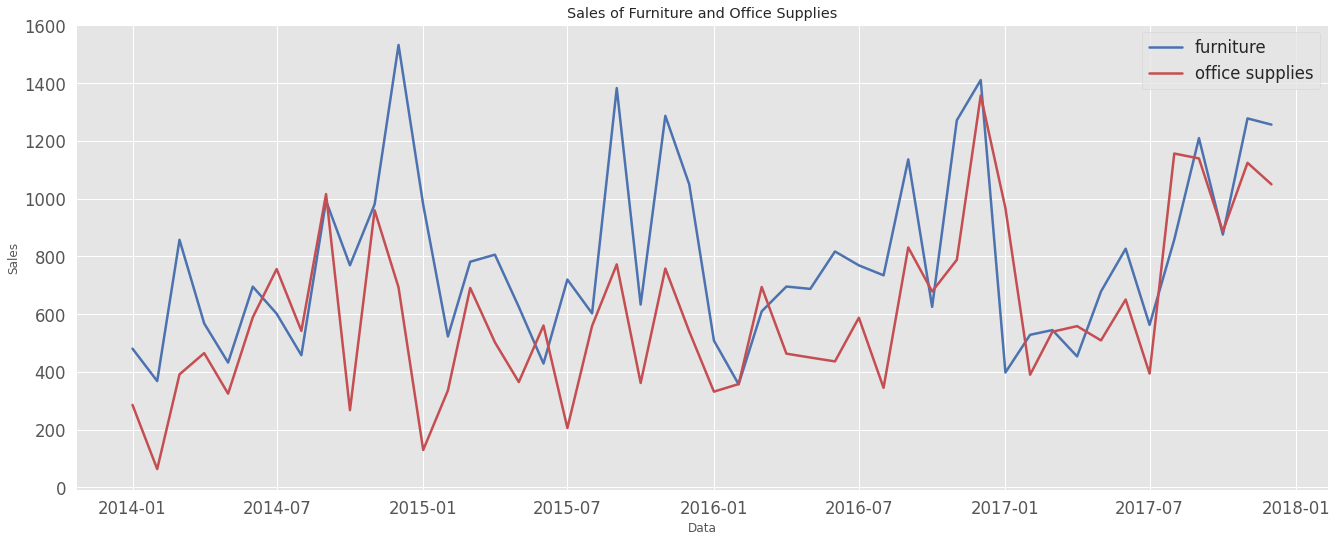

In [33]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date':y_office.index, 'Sales': y_office.values})

store = furniture.merge(office,how= 'inner',on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace = True)
store.head()

plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Data')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Office Supplies')
plt.legend(["furniture","office supplies"],loc= "upper right")

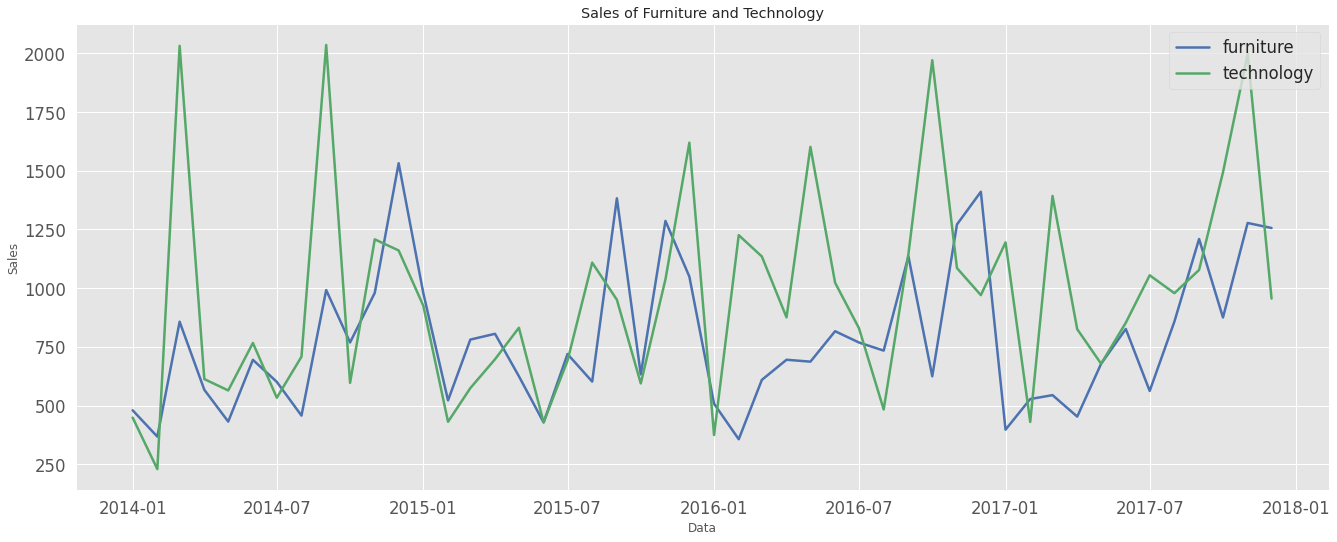

In [31]:
#Furniture and Technology
furniture = df.loc[df['Category'] == 'Furniture']
technology = df.loc[df['Category'] == 'Technology']
furniture.shape, technology.shape
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols, axis=1, inplace=True)
technology.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
technology = technology.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
technology = technology.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_technology = technology['Sales'].resample('MS').mean()
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
technology = pd.DataFrame({'Order Date':y_technology.index, 'Sales': y_technology.values})

store = furniture.merge(technology,how= 'inner',on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'technology_sales'}, inplace = True)
store.head()

plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['technology_sales'], 'g-', label = 'technology')
plt.xlabel('Data')
plt.ylabel('Sales')
plt.title('Sales of Furniture and Technology')
plt.legend(["furniture","technology"],loc= "upper right")


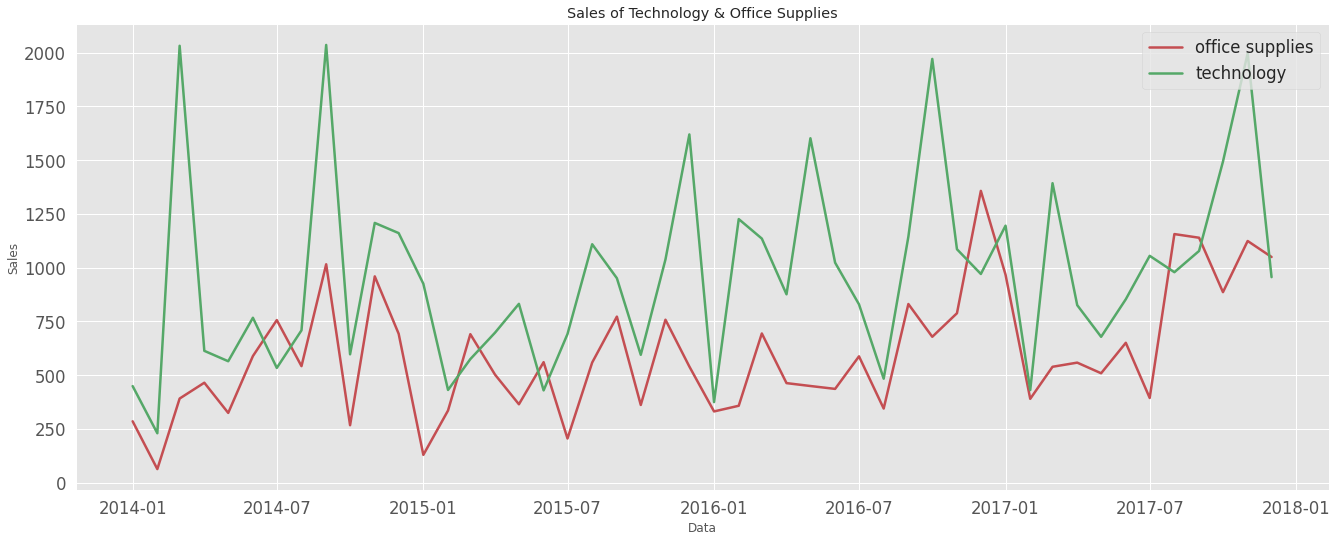

In [32]:
#So, now we have Office Supplies and Technology.
office = df.loc[df['Category'] == 'Office Supplies']
technology = df.loc[df['Category'] == 'Technology']
office.shape, technology.shape
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
office.drop(cols, axis=1, inplace=True)
technology.drop(cols, axis=1, inplace=True)

office = office.sort_values('Order Date')
technology = technology.sort_values('Order Date')
office = office.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
technology = technology.set_index('Order Date')
y_office = office['Sales'].resample('MS').mean()
y_technology = technology['Sales'].resample('MS').mean()

office = pd.DataFrame({'Order Date':y_office.index, 'Sales':y_office.values})
technology = pd.DataFrame({'Order Date':y_technology.index, 'Sales': y_technology.values})

store = technology.merge(office,how= 'inner',on='Order Date')
store.rename(columns={'Sales_x': 'technology_sales','Sales_y': 'office_sales' }, inplace = True)
store.head()

plt.figure(figsize=(20,8))
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office')
plt.plot(store['Order Date'], store['technology_sales'], 'g-', label = 'technology')

plt.xlabel('Data')
plt.ylabel('Sales')
plt.title('Sales of Technology & Office Supplies')
plt.legend(["office supplies","technology"],loc= "upper right")


##fbProphet

In [16]:
!pip install pystan==2.19
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.2 MB 1.2 MB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.7 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6271654 sha256=b58c277b341852d8f808ec43b5397fbcb7f70e903c543489b086dbbdceb5deb1
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [17]:
#Furniture
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
furniture.drop(cols, axis=1, inplace = True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
y_furniture = furniture['Sales'].resample('MS').mean()

#Technology
technology = df.loc[df['Category'] == 'Technology']
technology['Order Date'].min(), technology['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
technology.drop(cols, axis=1, inplace = True)
technology = technology.sort_values('Order Date')
technology.isnull().sum()
technology = technology.groupby('Order Date')['Sales'].sum().reset_index()
technology = technology.set_index('Order Date')
y_technology = technology['Sales'].resample('MS').mean()

#Office Supplies
office = df.loc[df['Category'] == 'Office Supplies']
office['Order Date'].min(), office['Order Date'].max()
cols = ['Row ID','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region','Product ID',
        'Category','Sub-Category','Product Name','Quantity','Discount','Profit']
office.drop(cols, axis=1, inplace = True)
office = office.sort_values('Order Date')
office.isnull().sum()
office = office.groupby('Order Date')['Sales'].sum().reset_index()
office = office.set_index('Order Date')
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
technology = pd.DataFrame({'Order Date':y_technology.index, 'Sales': y_technology.values})
office = pd.DataFrame({'Order Date':y_office.index, 'Sales': y_office.values})
print(furniture.head())


  Order Date       Sales
0 2014-01-01  480.194231
1 2014-02-01  367.931600
2 2014-03-01  857.291529
3 2014-04-01  567.488357
4 2014-05-01  432.049188


In [34]:
from fbprophet import Prophet

furniture = furniture.rename(columns={'Order Date':'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width = 0.95)
office_model.fit(office)

technology = technology.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
technology_model = Prophet(interval_width = 0.95)
technology_model.fit(technology)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [35]:
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)

office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)

technology_forecast = technology_model.make_future_dataframe(periods=36, freq='MS')
technology_forecast = technology_model.predict(technology_forecast)

Text(0.5, 1.0, 'Office Supplies Sales')

<Figure size 1440x720 with 0 Axes>

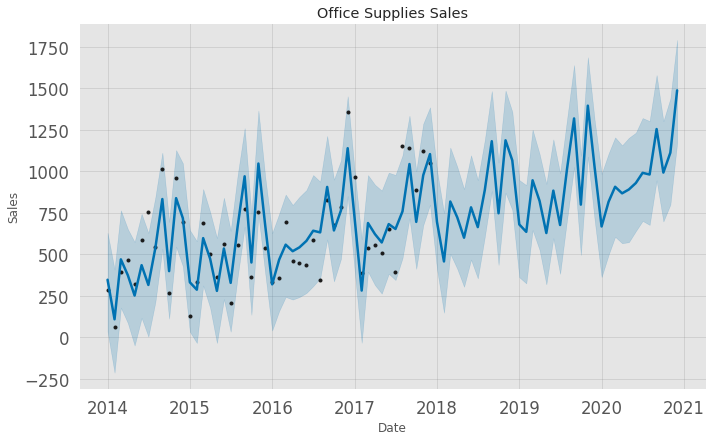

In [36]:
plt.figure(figsize=(20,10))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales')


Text(0.5, 1.0, 'Technology Sales')

<Figure size 1296x432 with 0 Axes>

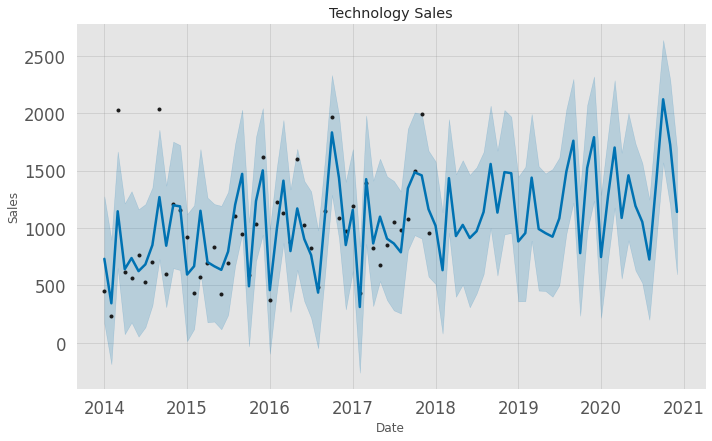

In [37]:
plt.figure(figsize=(18,6))
technology_model.plot(technology_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Technology Sales')

In [38]:
#Comparing Forecast
technology_names = ['technology_%s' % column for column in technology_forecast.columns]
office_names = ['office_%s' % column for column in office_forecast.columns]


merge_technology_forecast = technology_forecast.copy()
merge_office_forecast = office_forecast.copy()


merge_technology_forecast.columns = technology_names
merge_office_forecast.columns = office_names


forecast = pd.merge(merge_technology_forecast, merge_office_forecast, how = 'inner', left_on = 'technology_ds', right_on = 'office_ds')

forecast = forecast.rename(columns={'technology_ds': 'Date'}).drop('office_ds', axis=1)
forecast.head()


,Date,technology_trend,technology_yhat_lower,technology_yhat_upper,technology_trend_lower,technology_trend_upper,technology_additive_terms,technology_additive_terms_lower,technology_additive_terms_upper,technology_yearly,...,office_additive_terms,office_additive_terms_lower,office_additive_terms_upper,office_yearly,office_yearly_lower,office_yearly_upper,office_multiplicative_terms,office_multiplicative_terms_lower,office_multiplicative_terms_upper,office_yhat
0,2014-01-01,952.355848,168.792007,1275.051552,952.355848,952.355848,-220.575922,-220.575922,-220.575922,-220.575922,...,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,-140.040481,0.0,0.0,0.0,347.490278
1,2014-02-01,958.476983,-185.353214,900.068067,958.476983,958.476983,-613.862112,-613.862112,-613.862112,-613.862112,...,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,-385.678283,0.0,0.0,0.0,109.240162
2,2014-03-01,964.005750,651.299195,1665.962583,964.005750,964.005750,181.810553,181.810553,181.810553,181.810553,...,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,-31.379844,0.0,0.0,0.0,470.211349
3,2014-04-01,970.126885,75.759742,1214.477889,970.126885,970.126885,-328.523260,-328.523260,-328.523260,-328.523260,...,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,-134.291690,0.0,0.0,0.0,374.687188
4,2014-05-01,976.050565,178.322350,1320.335977,976.050565,976.050565,-237.352937,-237.352937,-237.352937,-237.352937,...,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,-263.821569,0.0,0.0,0.0,252.306682


Forecast and Trend Visualization

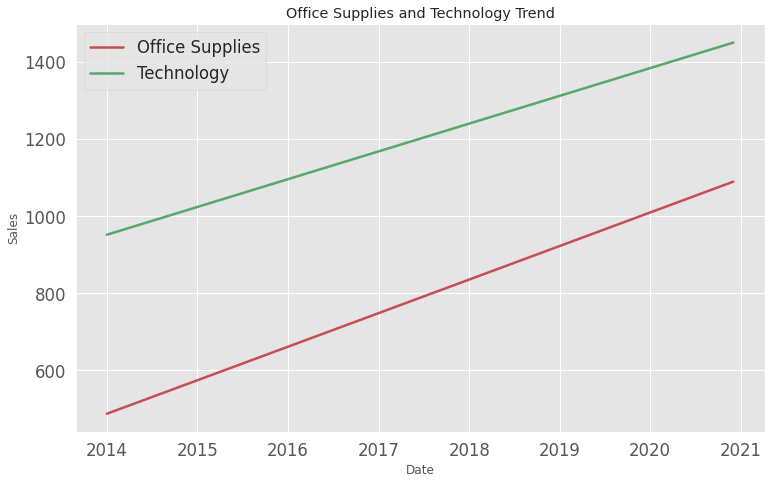

In [39]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#Office Supplies
plt.figure(figsize=(11, 7))
plt.plot(forecast['Date'], forecast['office_trend'], 'r-')
plt.plot(forecast['Date'], forecast['technology_trend'], 'g-')


plt.legend(['Office Supplies','Technology'])
plt.xlabel('Date'); plt.ylabel('Sales')
plt.title('Office Supplies and Technology Trend');


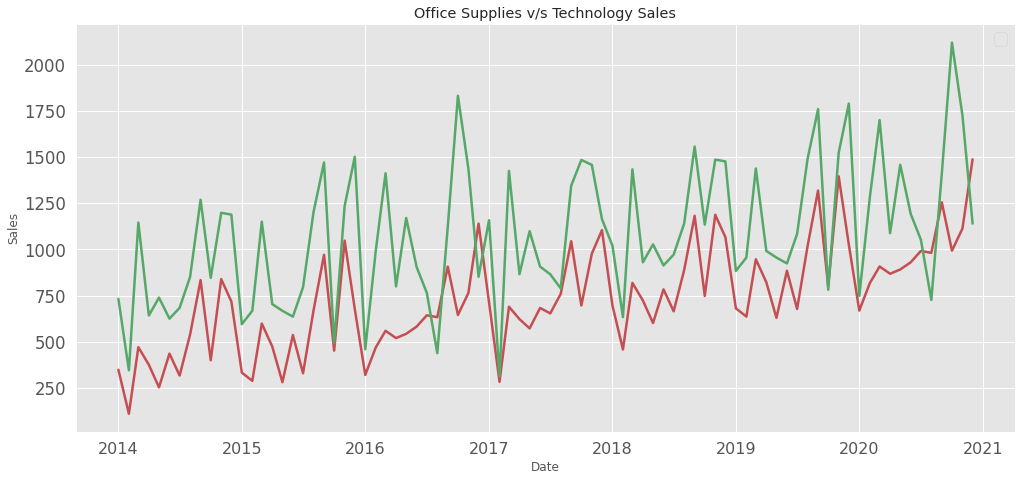

In [50]:
plt.figure(figsize=(15, 7))
plt.plot(forecast['Date'], forecast['office_yhat'], 'r-')
plt.plot(forecast['Date'], forecast['technology_yhat'], 'g-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Sales')
plt.tick_params(axis='x', labelsize=16)
plt.title('Office Supplies v/s Technology Sales');

Trends and Pattern

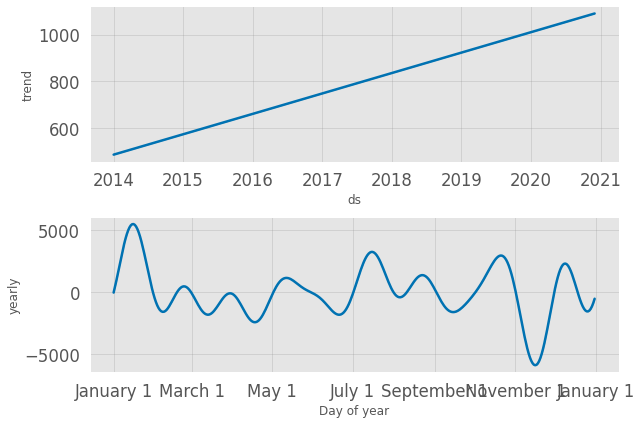

In [51]:
office_model.plot_components(office_forecast);

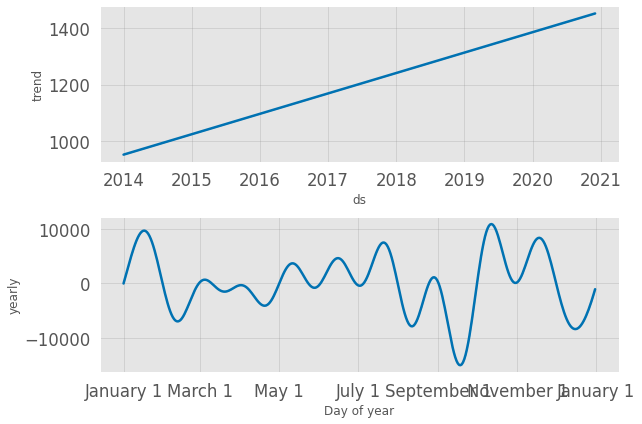

In [43]:
technology_model.plot_components(technology_forecast);